In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("df.csv")
df

,x1,x2,x3,one,y,z
0,8.973478,2.207377,9.061502,1,12.848586,True
1,8.356966,5.851814,1.047791,1,32.750062,True
2,3.702320,3.078078,7.416740,1,2.742693,False
3,8.535779,2.445276,5.936232,1,18.801234,True
4,9.286952,1.654095,3.647136,1,26.139734,True
...,...,...,...,...,...,...
95,7.378573,5.316028,3.833651,1,22.572937,True
96,6.772877,2.107771,2.921814,1,20.971000,True
97,4.397059,4.314333,2.161714,1,19.151798,True
98,7.890429,8.240892,8.997042,1,17.869370,False


In [2]:
def get_row(i):
    return df.loc[i, "x1":"one"].values.reshape(1,-1).astype(float)

vec2 = np.array([[ 1.37239431],
                 [-1.16675093],
                 [-1.32467119],
                 [ 6.59925245]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def classification_model_v1(row):
    return sigmoid(row @ vec2).round().astype(bool)

def classification_model_v2(row):
    return row @ vec2 >= 0

eq = classification_model_v1(df.loc[:, "x1":"one"]) == classification_model_v2(df.loc[:, "x1":"one"])
eq[0].value_counts()

True    100
Name: 0, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [21]:
train, test = train_test_split(df, train_size = 0.5, stratify = df['z'])
train.head()

,x1,x2,x3,one,y,z
47,1.788779,9.549090,2.295935,1,14.334133,False
92,1.532347,5.160233,9.547453,1,-4.220109,False
1,8.356966,5.851814,1.047791,1,32.750062,True
34,3.970822,5.663960,0.408244,1,19.273661,True
90,0.121457,2.122451,8.748635,1,-11.528025,False


In [22]:
train['z'].value_counts()

True     30
False    20
Name: z, dtype: int64

In [24]:
test.head()

,x1,x2,x3,one,y,z
45,9.155967,4.432187,7.066358,1,20.476702,True
61,8.078886,1.264706,7.784988,1,14.324082,True
49,5.196524,3.575862,6.263268,1,10.435747,True
38,7.480464,2.927084,1.911275,1,25.840455,True
3,8.535779,2.445276,5.936232,1,18.801234,True


In [25]:
test['z'].value_counts()

True     31
False    19
Name: z, dtype: int64

In [26]:
train.shape, test.shape

((50, 6), (50, 6))

In [27]:
lr = LogisticRegression()
lr.fit(train.loc[:,'x1':'x3'], train['z'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.score(train.loc[:,'x1':'x3'], train['z']) # BAD!

0.98

In [29]:
lr.score(test.loc[:,'x1':'x3'], test['z'])

0.94

In [42]:
features = 50
rows = 50
x = np.random.uniform(0,10,rows)
df = pd.DataFrame({f"x{i}": x+np.random.normal(size=x.size, scale=5) for i in range(features)})
df["y"] = x > 5
train, test = train_test_split(df, test_size=0.5)
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
24,6.325019,14.542406,5.344056,7.215512,9.284915,4.435561,15.532108,0.045855,15.682052,13.437947,...,8.727140,12.794621,8.644423,-2.916037,5.429157,4.443952,9.926960,9.731078,4.450104,True
7,14.185608,2.729661,14.853411,1.293009,9.984313,0.613119,6.567137,2.069083,-4.097695,3.260315,...,0.508622,1.898565,3.503996,5.111147,7.002299,-2.150898,3.160819,3.834708,7.032108,False
6,11.052948,-5.783352,-4.212595,7.323770,7.159110,0.438650,7.077599,2.400827,-0.884193,3.137186,...,5.643894,3.135871,-0.110766,1.728910,-2.455786,-0.726803,5.602556,4.670391,4.799268,False
27,5.199082,3.957836,11.018727,-4.861535,3.940765,7.434628,7.635110,4.846039,8.994861,1.865242,...,10.142696,10.849314,14.208459,3.624314,10.690543,1.582358,8.317008,1.473296,-1.223552,True
12,3.815869,12.035259,2.079250,8.749674,1.263504,4.033628,-0.322017,4.028014,1.696324,7.013096,...,4.758739,-10.054530,-1.483371,-0.500752,-2.210582,-7.601450,-2.392727,1.897703,-8.568408,False


In [43]:
lr = LogisticRegression()#penalty="none"
lr.fit(train.iloc[:, :-1], train["y"])
lr.score(train.iloc[:, :-1], train["y"]), lr.score(test.iloc[:, :-1], test["y"])

(1.0, 0.96)

In [64]:
n = 1000
df = pd.DataFrame({'x': np.random.uniform(-10, 10, n), 'y': np.random.uniform(-10, 10, n)})
df['color'] = 'lightgray'
dist = ((df['x']-4)**2 + (df['y']-1)**2) ** 0.5
df.loc[dist < 4 + np.random.normal(size = n), 'color'] = 'black'
df. head()

,x,y,color
0,-2.321715,2.614126,lightgray
1,6.312830,7.188072,lightgray
2,-3.323446,4.276480,lightgray
3,5.411383,5.799560,lightgray
4,6.044006,0.688375,black


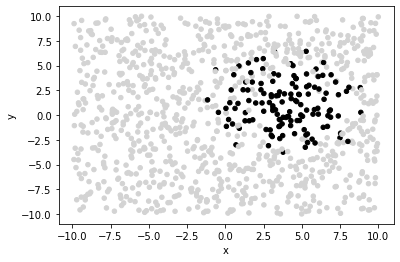

In [65]:
df.plot.scatter(x = 'x', y = 'y', c = df['color'])

In [66]:
train, test = train_test_split(df)
train.head()

,x,y,color
630,-7.071818,7.600532,lightgray
817,-3.192871,-0.509993,lightgray
761,9.356216,4.017694,lightgray
2,-3.323446,4.276480,lightgray
519,1.109336,-8.531354,lightgray


In [67]:
lr = LogisticRegression()
lr.fit(train[['x', 'y']], train['color'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
lr.score(test[['x', 'y']], test['color'])

0.856

In [69]:
df['color'].value_counts()/len(df['color'])

lightgray    0.867
black        0.133
Name: color, dtype: float64

In [71]:
test = test.copy()
test['predicted_color'] = lr.predict(test[['x', 'y']])
test.head()

,x,y,color,predicted_color
372,-5.722376,7.040011,lightgray,lightgray
350,-2.781993,2.233957,lightgray,lightgray
808,3.297674,6.891914,lightgray,lightgray
83,8.325487,7.268611,lightgray,lightgray
790,3.714111,1.324806,black,lightgray


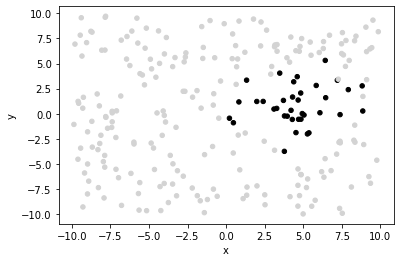

In [72]:
test.plot.scatter(x = 'x', y = 'y', c = test['color'])

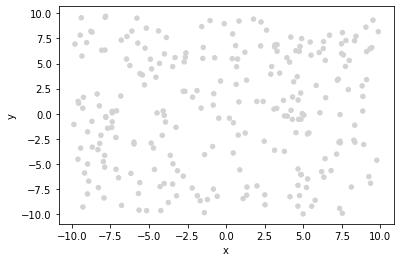

In [73]:
test.plot.scatter(x = 'x', y = 'y', c = test['predicted_color'])

In [78]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(include_bias = False)
pd.DataFrame(pf.fit_transform(train[['x', 'y']]), columns = pf.get_feature_names(['x', 'y'])).head()

,x,y,x^2,x y,y^2
0,-7.071818,7.600532,50.010606,-53.749575,57.768083
1,-3.192871,-0.509993,10.194426,1.628342,0.260093
2,9.356216,4.017694,87.538782,37.590410,16.141862
3,-3.323446,4.276480,11.045296,-14.212652,18.288281
4,1.109336,-8.531354,1.230627,-9.464140,72.784000


In [79]:
pf.fit_transform(test[['x', 'y']])

array([[ -5.72237647,   7.04001138,  32.74559251, -40.28559551,
         49.56176026],
       [ -2.78199296,   2.2339573 ,   7.73948481,  -6.21485347,
          4.99056522],
       [  3.29767425,   6.89191414,  10.87465546,  22.7272878 ,
         47.49848051],
       ...,
       [  3.30101158,   6.22656634,  10.89667747,  20.5539676 ,
         38.77012835],
       [  8.86405317,   1.72266606,  78.57143867,  15.26980352,
          2.96757834],
       [ -2.17375333,   1.648795  ,   4.72520354,  -3.58407361,
          2.71852494]])

In [80]:
pipe = Pipeline([('poly',PolynomialFeatures(include_bias = False)), ('logr', LogisticRegression())])
pipe.fit(train[['x', 'y']], train['color'])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('logr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [81]:
pipe.score(test[['x', 'y']], test['color'])

0.952

In [82]:
test['predicted_color'] = pipe.predict(test[['x', 'y']])
test.head()

,x,y,color,predicted_color
372,-5.722376,7.040011,lightgray,lightgray
350,-2.781993,2.233957,lightgray,lightgray
808,3.297674,6.891914,lightgray,lightgray
83,8.325487,7.268611,lightgray,lightgray
790,3.714111,1.324806,black,black


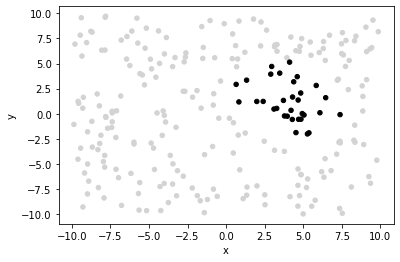

In [83]:
test.plot.scatter(x = 'x', y = 'y', c = test['predicted_color'])

In [84]:
x1 = np.random.uniform(0,1,100)
x2 = np.random.uniform(8000,9000,100)
y = x1 * 1000 + x2 > 9000
df = pd.DataFrame({"x1":x1, "x2":x2, "y":y})
df.head()

,x1,x2,y
0,0.154518,8847.167891,True
1,0.817577,8792.842772,True
2,0.542287,8143.670138,False
3,0.327599,8539.178780,False
4,0.781014,8755.077165,True


In [85]:
train, test = train_test_split(df)
lr = LogisticRegression()
lr.fit(train[["x1", "x2"]], train["y"])
lr.score(test[["x1", "x2"]], test["y"])

0.56

In [89]:
pipe = Pipeline([
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])

In [90]:
pipe.fit(train[["x1", "x2"]], train["y"])
pipe.score(test[["x1", "x2"]], test["y"])

0.92